Pendulum problem using Finite Difference

In [21]:
import math
import numpy
from matplotlib import pyplot as plt


In [22]:
# create dictionaries for velocity and angle
v = dict()
theta = dict()

In [23]:
#constants
g = 980
l = 100
ld = math.sqrt(g/l)
dt = 0.01

In [24]:
#exact analytical solution (only for small angles)
v[0] = math.sqrt((2*g*l)*(1-math.cos(math.radians(10))))
print(v[0]/ld)
print(ld)
initial_angle = 0

def ang(t):
    ang = (v[0] / ld) * math.sin(ld * t) + initial_angle * math.cos(ld * t)
    return ang

17.431148549531656
3.1304951684997055


In [25]:
#initialize theta

theta[0] = 0


In [26]:
def f(th):
    f = (2*g*l)*(math.cos(math.radians(th))-math.cos(math.radians(10)))
    if f > 0:
        return math.sqrt(f)
    else:
        return - math.sqrt(-f)

In [27]:
#difference equations
i = 0
while(theta[i] < 10):
    theta[i + 1] = theta[i] + f(theta[i]) * dt
    i = i + 1

In [28]:
#copy the values of theta with appropriate shift to map for other quadrants
theta_cycle = list(theta.values())
theta_cycle.extend(reversed(theta_cycle))
theta_cycle_34 = [-i for i in theta_cycle]
theta_cycle.extend(theta_cycle_34)
theta_final = dict(zip(list(range(0,len(theta_cycle))),theta_cycle))


In [29]:
t = [0.01 * i for i in range(0,len(theta_cycle))]
theta_an = [ang(t[i]) for i in range(0,len(theta_cycle))]
theta_an

[0.0,
 0.5455921395846132,
 1.0906496425365646,
 1.6346383961243052,
 2.1770253349051303,
 2.7172789630866507,
 3.2548698753501357,
 3.789271275625353,
 4.319959493308563,
 4.846414496417793,
 5.368120401182572,
 5.884565977568726,
 6.39524515024291,
 6.899657494485921,
 7.3973087265688875,
 7.887711188111751,
 8.370384323949464,
 8.844855153037582,
 9.310658731935838,
 9.76733861041551,
 10.214447278744107,
 10.651546606209093,
 11.078208270450926,
 11.494014177184694,
 11.898556869899036,
 12.291439929130936,
 12.672278360925066,
 13.040698974097035,
 13.396340745930905,
 13.738855175952542,
 14.067906627432206,
 14.383172656281667,
 14.68434432702362,
 14.971126515523723,
 15.243238198188632,
 15.50041272734663,
 15.742398092541,
 15.968957167480118,
 16.17986794240223,
 16.374923741627253,
 16.5539334260824,
 16.716721580603178,
 16.86312868582621,
 16.99301127450545,
 17.10624207209858,
 17.20271012148591,
 17.282320891699438,
 17.34499637055567,
 17.390675141101287,
 17.419312441

Text(0, 0.5, 'theta')

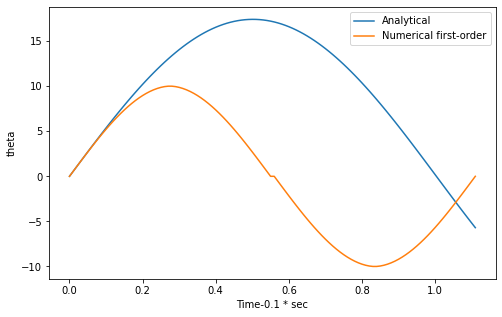

In [30]:
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.plot(t,theta_an, label = "Analytical")
plt.plot(t, theta_cycle,label = "Numerical first-order")
plt.legend()
plt.xlabel('Time-0.1 * sec')
plt.ylabel('theta')